# 加载数据

In [204]:
### 加载数据集
import pandas as pd
import numpy as np
df =pd.read_csv('titanic_data.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 问题提出

数据文件中有乘客的船舱、年龄和是否在灾难中生存下来的数据。

本项目探索什么因素影响乘客的生还率。

# 数据清洗和整理

针对第一步加载数据，对数据的查看，可看到PassengerId 、Name 、 Ticket 都是每一行的唯一值，对于统计数据无意义，可以对这些列予以废弃

In [205]:
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
df=df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [206]:
print df.info()
print '='*50
print df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454

从上图的df.info()结果可知，Age、Cabin和Embarked存在缺失值，而Cabin只有204条非空值，可废弃此维度，不作为统计依据

另外，由于Age和Embarked的缺失值可接受范围，但是要进行空值填充，统计时需体现出这些数

从上面可知Age是数值型，Embaked是字符串类型，而Age的最小值为0.42,大于0，所以此处空值可以填充为-1

由于Embarked只有两条记录为空，所以对于Embarked可以删掉空行

而Age有177条记录为空，占总数的20%，所以进行空值填充，此处进行均值填充

In [207]:
# df=df.drop('Cabin' ,axis=1)
# df=df.fillna(-1)
embarked_df=df.loc[:,['Embarked','Survived']].dropna()
avg_age=df.mean()['Age']
print avg_age
age_df=df.fillna(avg_age)
print age_df.info()
print '='*50
print 'age_df:'
age_df.head(10)


29.6991176471
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
None
age_df:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,29.6991,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,29.6991,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,29.6991,S
5,0,3,male,29.699118,0,0,8.4583,29.6991,Q
6,0,1,male,54.000000,0,0,51.8625,E46,S
7,0,3,male,2.000000,3,1,21.0750,29.6991,S
8,1,3,female,27.000000,0,2,11.1333,29.6991,S
9,1,2,female,14.000000,1,0,30.0708,29.6991,C


## 数据探索

In [208]:
#先看看整体的生还率
df.Survived.describe()
all_count=df.Survived.count()
#总体生还率
survived_count=df.Survived[df.Survived==1].count()
survived_rate=survived_count*1.0/all_count
survived_rate

0.38383838383838381

总体生还率：38%

In [209]:
df.columns


Index([u'Survived', u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Cabin', u'Embarked'],
      dtype='object')

Embarked/Sex是字符类型，是离散变量，

上面的直方图统计是针对数值型的，所以可以针对上面直方图的除了Survived列的值进行查看，以区分出连续变量和离散变量（甚至判断连续变量是否可作为离散变量对待）

约定枚举值大于10个的数值型，视为连续变量处理
数值型列：Age/Fare/Parch/Pclass/SibSp

In [210]:
def getEnumCount(col_name):
    return len(df.groupby(col_name).groups.keys())

In [211]:
num_cols=['Age','Fare','Parch','Pclass','SibSp']
for i in num_cols:
    print i,getEnumCount(i)

Age 88
Fare 248
Parch 7
Pclass 3
SibSp 7


由此可看到，Age/Fare作为连续型变量

Parch/Pclass/SibSp视作离散变量处理，加上Embarked/Sex 有：

连续变量

 - continuous_cols=['Age','Fare']

离散变量

 - discrete_cols=['Parch','Pclass','SibSp','Embarked','Sex']

In [212]:
continuous_cols=['Age','Fare']
discrete_cols=['Parch','Pclass','SibSp','Embarked','Sex']

# 离散变量分组统计

Survived作为指标，其他作为<font color=red >维度</font>，依次对各维度与指标的关系进行查看

把维度值都作为离散变量进行分析

为了方便统计，加入一列extra_col用于统计数量时作为固定列进行索引取数

In [213]:
df['extra_col']=1
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,extra_col
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,1
5,0,3,male,NaN,0,0,8.4583,NaN,Q,1
6,0,1,male,54.0,0,0,51.8625,E46,S,1
7,0,3,male,2.0,3,1,21.0750,NaN,S,1
8,1,3,female,27.0,0,2,11.1333,NaN,S,1
9,1,2,female,14.0,1,0,30.0708,NaN,C,1


从kaggle(https://www.kaggle.com/c/titanic/data)数据集的说明中 可以看到各列的意思：

## Data Dictionary
- Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes

**pclass**: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp** : The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**parch**: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

### 上图小结1

上面各个图说明的情况是：

**Parch**  
 - 可看到独身旅游的人最多，但是独身旅游的人相对 其他有父母孩子的人 的死亡人数比获救人数多  

**Pclass**  
Pclass代表经济地位（1的经济地位最高）  
 - 社会地位低的人数最多  
 - 社会地位低的死亡人数比其他两个等级的死亡人数多很多  
 - 社会地位低的生存人数比其他两个等级的生存人数不低地位高的多很多  

**SibSp**  
 - 无兄弟姐妹的人最多

**Embarked**
 - 在Southampton上船的人最多  

**Sex**
 - 女性中：  生存人数是死亡人数的两倍多  
 - 男性中：  死亡人数是生存人数的3-4倍

### 计算各个离散变量对应的生还率

In [214]:
def survived_rate_by(df,col_name):
    t=df.groupby(by=[col_name,'Survived']).sum()['extra_col']
    df1=pd.DataFrame(t)
    df2=df1.unstack()
    return df2
#获取生还率
def get_Survived_rate(df,col_name):
    df2=pd.DataFrame(survived_rate_by(df,col_name))
    df2.columns=df2.columns.droplevel() #http://pandas.pydata.org/pandas-docs/stable/generated/pandas.MultiIndex.droplevel.html
    df2['Survived_rate']=df2[1]/(df2[0]+df2[1])
    df2=df2.fillna(0)
    return df2
def  showplot(df,col_name,kind='bar'):
    df2=get_Survived_rate(df,col_name)
    print df2
    #生还率
    df2.Survived_rate.plot(kind='bar' ,title='Survived Rate of %s' % (col_name,))
    #改用堆叠图
    df.groupby([col_name,'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True',title='Survived  of %s' % (col_name,))
    
#隔分类与总人数占比
all_count=df.count()['Pclass']
def count_rate(tmp_df):
    tmp_df['people_rate']=(tmp_df[0]+tmp_df[1])/all_count
    return tmp_df

### Parch

Survived      0      1  Survived_rate
Parch                                
0         445.0  233.0       0.343658
1          53.0   65.0       0.550847
2          40.0   40.0       0.500000
3           2.0    3.0       0.600000
4           4.0    0.0       0.000000
5           4.0    1.0       0.200000
6           1.0    0.0       0.000000


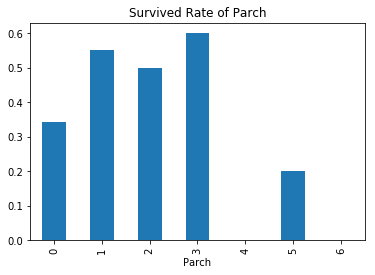

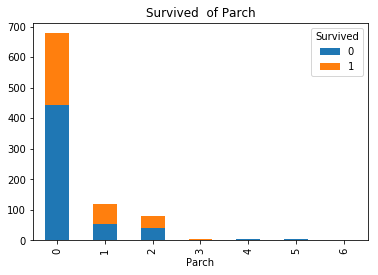

In [215]:
showplot(df,'Parch')


In [216]:
count_rate(get_Survived_rate(df,'Parch'))

Survived,0,1,Survived_rate,people_rate
Parch,,,,
0,445.0,233.0,0.343658,0.760943
1,53.0,65.0,0.550847,0.132435
2,40.0,40.0,0.500000,0.089787
3,2.0,3.0,0.600000,0.005612
4,4.0,0.0,0.000000,0.004489
5,4.0,1.0,0.200000,0.005612
6,1.0,0.0,0.000000,0.001122


总体平均的生还率是38%  
从这里可看到高于总体生还率的是有1-3个的父母/子女的生还率高于无父母/孩子的，Parch=3及以上的人数都是个位数，剩下的Parch=1/2的生还率高于总体生还率  


### Pclass

Survived    0    1  Survived_rate
Pclass                           
1          80  136       0.629630
2          97   87       0.472826
3         372  119       0.242363


Survived,0,1,Survived_rate,people_rate
Pclass,,,,
1,80,136,0.629630,0.242424
2,97,87,0.472826,0.206510
3,372,119,0.242363,0.551066


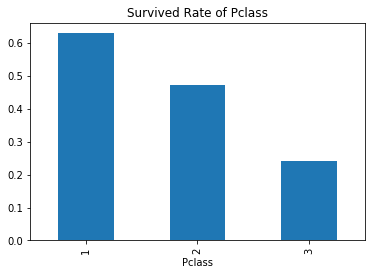

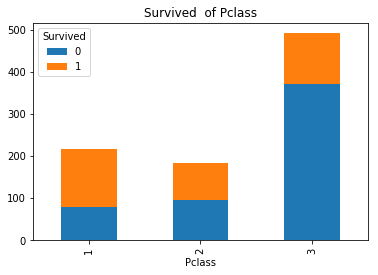

In [217]:
showplot(df,'Pclass')
count_rate(get_Survived_rate(df,'Pclass'))

这里可看到，社会等级越高，生还率越高

### SibSp 

Survived      0      1  Survived_rate
SibSp                                
0         398.0  210.0       0.345395
1          97.0  112.0       0.535885
2          15.0   13.0       0.464286
3          12.0    4.0       0.250000
4          15.0    3.0       0.166667
5           5.0    0.0       0.000000
8           7.0    0.0       0.000000


Survived,0,1,Survived_rate,people_rate
SibSp,,,,
0,398.0,210.0,0.345395,0.682379
1,97.0,112.0,0.535885,0.234568
2,15.0,13.0,0.464286,0.031425
3,12.0,4.0,0.250000,0.017957
4,15.0,3.0,0.166667,0.020202
5,5.0,0.0,0.000000,0.005612
8,7.0,0.0,0.000000,0.007856


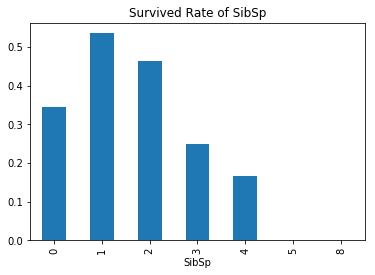

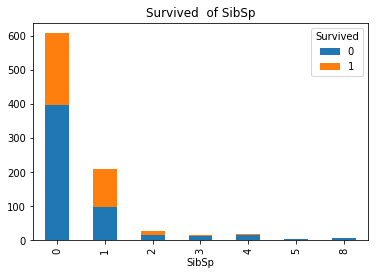

In [218]:
showplot(df,'SibSp')
count_rate(get_Survived_rate(df,'SibSp'))

这里可看到有1/2兄弟姐妹的部分生还率比总体的高

## Embarked

Survived    0    1  Survived_rate
Embarked                         
C          75   93       0.553571
Q          47   30       0.389610
S         427  217       0.336957


Survived,0,1,Survived_rate,people_rate
Embarked,,,,
C,75,93,0.553571,0.188552
Q,47,30,0.389610,0.086420
S,427,217,0.336957,0.722783


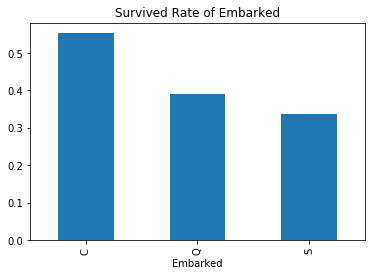

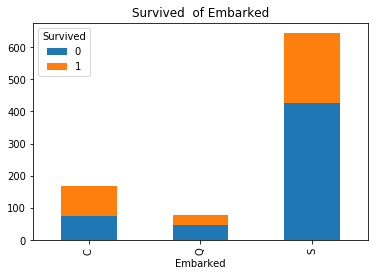

In [219]:
embarked_df['extra_col']=1
showplot(embarked_df,'Embarked')
count_rate(get_Survived_rate(df,'Embarked'))

Cherbourg登船的生还率最高

### Sex

Survived    0    1  Survived_rate
Sex                              
female     81  233       0.742038
male      468  109       0.188908


Survived,0,1,Survived_rate,people_rate
Sex,,,,
female,81,233,0.742038,0.352413
male,468,109,0.188908,0.647587


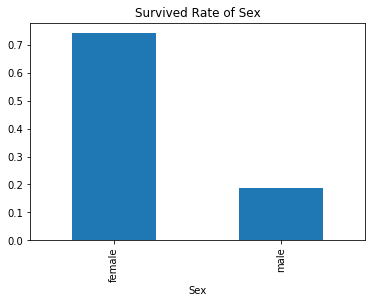

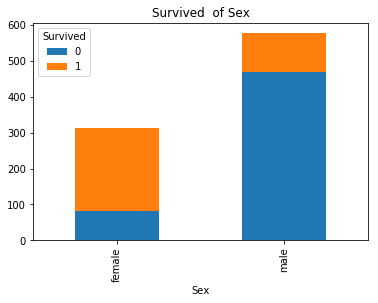

In [220]:
showplot(df,'Sex')
count_rate(get_Survived_rate(df,'Sex'))

可看到女星的生还率比男性的生还率高出三倍多

## 对连续变量处理
continuous_cols=['Age','Fare']

对于连续变量，这里的做法是将连续变量离散化

### Age

按年龄分组，生成各个年龄段

In [221]:
bins=np.arange(0,90,10)

Age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived_rate, dtype: float64


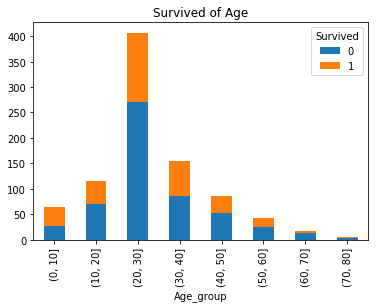

In [222]:
age_df['Age_group']=pd.cut(age_df['Age'],bins)
age_groups=age_df.groupby(['Age_group','Survived'])['Age'].count()
print new_age_df['Survived_rate']
age_groups.unstack().plot(kind='bar',stacked='True',title='Survived of Age')


生还率


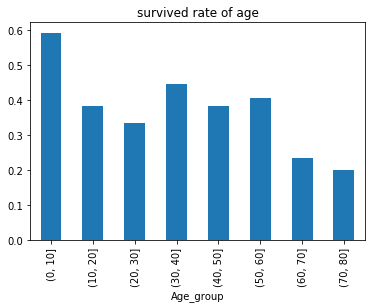

In [223]:
new_age_df=pd.DataFrame(age_groups).unstack()
new_age_df.columns=new_age_df.columns.droplevel()
new_age_df['Survived_rate']=new_age_df[1]/(new_age_df[0]+new_age_df[1])
print u'生还率'
new_age_df['Survived_rate'].plot(kind='bar',title='survived rate of age')

对比总体生还率38%，只有0-10岁阶段是有比较更高的生还率，其余其余不太明显。

### Fare

同样，对fare分组

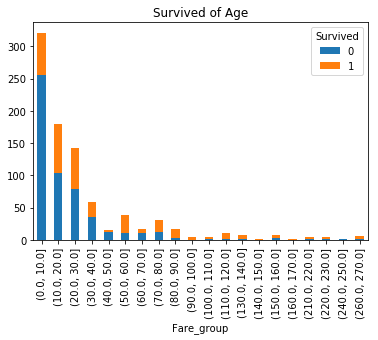

In [224]:
bins=np.arange(0,fare_df['Fare'].max(),10)
#去掉无法确认的值
fare_df=df.loc[:,['Fare','Survived']]
fare_df['Fare_group']=pd.cut(fare_df['Fare'],bins)
fare_groups=fare_df.groupby(['Fare_group','Survived'])['Fare_group'].count()
fare_groups.unstack().plot(kind='bar',stacked='True',title='Survived of Age')

生还率


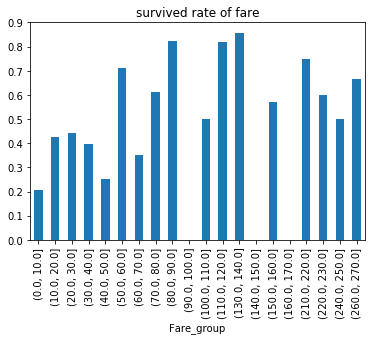

In [225]:
new_fare_df=pd.DataFrame(fare_groups).unstack()
new_fare_df.columns=new_fare_df.columns.droplevel()
new_fare_df['Survived_rate']=new_fare_df[1]/(new_fare_df[0]+new_fare_df[1])
print u'生还率'
new_fare_df['Survived_rate'].plot(kind='bar',title='survived rate of fare')

票价呈现杂乱无章的生还率，可得出fare与票价无关

# 结论

 - 总体生还率38%
 - 上面可看到父母/子女的生还率会比较高 (>=50%)
 - 客舱等级越高，生还率越高  ( 62.9%>47.3%>24% )
 - 有1或2个兄弟姐妹的生还率会高一点 ( >=46% )
 - Cherbourg登船的生还率较高 (55.4%)
 - 女性生还率比男性高   (74.2%>18.9%)
 - 年龄10岁的生还可能性更高 (59.3%)

另外，需要注意一下几点：

- 年龄中有20%数据缺失，数据用平均值进行了空值填充
- 登船地点有3条记录缺失，不影响总体，所以直接删除这三条记录
